In [1]:
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [2]:
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [3]:
modelo = RandomForestClassifier()

In [4]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
param_dist = {
    "n_estimators": randint(10, 200),
    "max_depth": randint(1, 10),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": [ "sqrt", "log2", None],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy", "log_loss"]
}
random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000230499D0160>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002300A6AC1F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002300A677F70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002300A677700>},
                   random_state=42)

In [5]:
random_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 151}

In [6]:
modelo = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'],
                                       max_depth=random_search.best_params_['max_depth'],
                                       min_samples_split=random_search.best_params_['min_samples_split'],
                                       min_samples_leaf=random_search.best_params_['min_samples_leaf'],
                                       max_features=random_search.best_params_['max_features'],
                                       bootstrap=random_search.best_params_['bootstrap'])
modelo.fit(X_treino,y_treino)

RandomForestClassifier(max_depth=9, min_samples_leaf=4, n_estimators=151)

0.8765732846122615

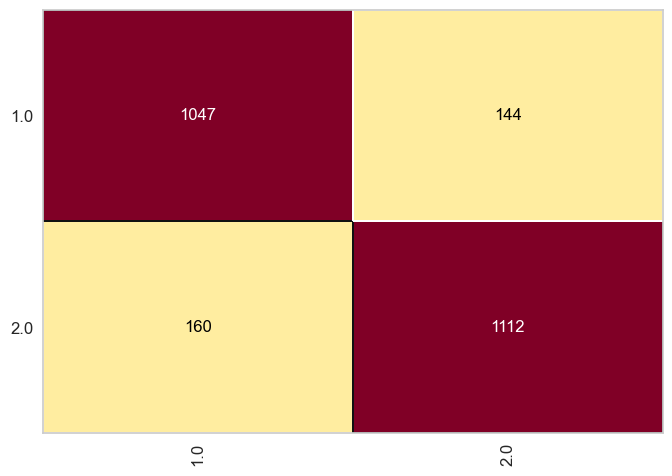

In [7]:
previsoes = modelo.predict(X_teste)
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [8]:
accuracy = modelo.score(X_teste, y_teste)
accuracy

0.8765732846122615

In [9]:
accuracies = []

for train_index, test_index in kf.split(X_treino,y_treino):
    X_train, X_val = X_treino[train_index], X_treino[test_index]
    y_train, y_val = y_treino[train_index], y_treino[test_index]
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_teste)
    accuracy = accuracy_score(y_teste, y_pred)
    accuracies.append(accuracy)
    # Now you have train and validation sets for each fold
print("Accuracies for each fold:", accuracies, np.mean(accuracies), "+-", np.std(accuracies))

Accuracies for each fold: [0.8806333739342266, 0.8765732846122615, 0.881039382866423, 0.878603329273244, 0.881851400730816, 0.88022736500203, 0.877791311408851, 0.8790093382054405, 0.8790093382054405, 0.8725131952902964] 0.8787251319529028 +- 0.0025552771380527054
